In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as im

In [2]:
def linear_transformation(src, standard_matrix):
    row, col, _ = src.shape
    corners = np.array([[0, 0, col-1, col-1], [0, row-1, 0, row-1]])
    new_points = standard_matrix.dot(corners).astype(int)

    x_coord = new_points[0, :]
    y_coord = new_points[1, :]

    min_x = np.amin(x_coord)
    max_x = np.amax(x_coord)
    min_y = np.amin(y_coord)
    max_y = np.amax(y_coord)

    new_x = max_x-min_x + 1
    new_y = max_y-min_y + 1
    result = np.full((new_y, new_x, 3), 200)

    y = min_y
    for i in range(new_y):
        x = min_x
        for j in range(new_x):
            pts = np.array([[x], [y]])
            newpts = np.linalg.inv(standard_matrix).dot(pts).round().astype(int)
            if newpts[0] >= 0 and newpts[0] < col and newpts[1] >=0 and newpts[1] < row:
                result[i, j, :] = src[newpts[1], newpts[0], :]
            x += 1
        y += 1

    return result

In [3]:
def translation(src, move):
    row, col, _ = src.shape
    steps = np.absolute(move)

    new_y = row + 2*steps[1]
    new_x = col + 2*steps[0]
    result = np.full((new_y, new_x, 3), 200)
    for i in range(new_y):
        for j in range(new_x):
            yp = i - move[0]
            xp = j - move[1]
            if xp >=0 and xp < col and yp >= 0 and yp < row:
                result[i, j, :] = src[yp, xp, :]
    return result

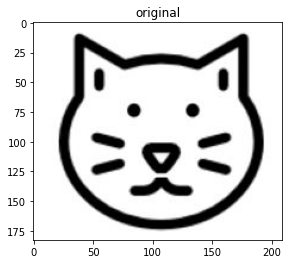

In [4]:
src = im.imread('Cat.jpg')
plt.title('original')
plt.imshow(src)

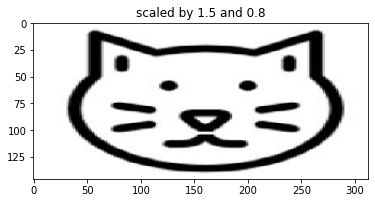

In [5]:
exp_image = linear_transformation(src, np.array([[1.5, 0], [0, 0.8]]))
plt.title('scaled by 1.5 and 0.8')
plt.imshow(exp_image)

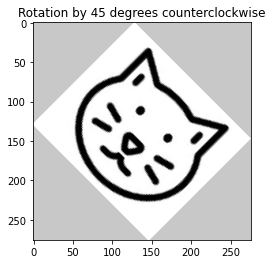

In [6]:
rotation_image = linear_transformation(src, np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)],
                                               [np.sin(np.pi/4), np.cos(np.pi/4)]]))
plt.title('Rotation by 45 degrees counterclockwise')
plt.imshow(rotation_image)

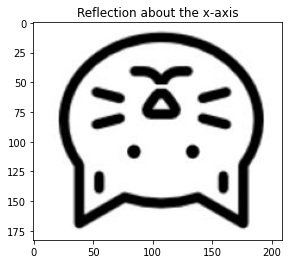

In [7]:
reflection_image = linear_transformation(src, np.array([[1, 0], [0, -1]]))
plt.title('Reflection about the x-axis')
plt.imshow(reflection_image)

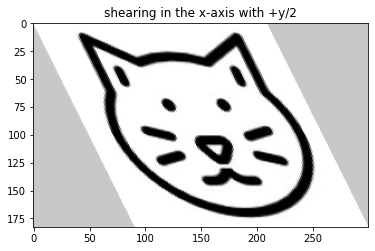

In [8]:
shearing_image = linear_transformation(src, np.array([[1, .5], [0, 1]]))
plt.title('shearing in the x-axis with +y/2')
plt.imshow(shearing_image)

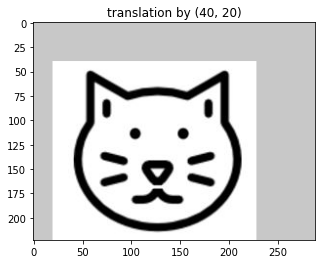

In [9]:
translation_image = translation(src, [40, 20])
plt.title('translation by (40, 20)')
plt.imshow(translation_image)